Лабораторная работа №2, Войтко Д.А., гр. 2371

1. https://www.kaggle.com/datasets/arpitsinghaiml/world-population - выбранный датасет для выполнения лабораторной работы.
2. Изменим датасет, удалив из него не цифровые значения и добавив новый столбец: Avg_pop - среднее количество населения в период с 1980 по 2050

In [2]:
import numpy as np
import pandas as pd 
from feature_engine.outliers import OutlierTrimmer
import plotly.express as px

#OutlierTrimmer необходим для работы с выбросами

dframe = pd.read_csv('countries-table.csv') # Чтение датасета

print(dframe.head())

   place    pop1980     pop2000     pop2010     pop2023     pop2024  \
0    356  687354000  1057920000  1243480000  1438070000  1450940000   
1    156  983164000  1269580000  1351560000  1422580000  1419320000   
2    840  229859000   281484000   311063000   343477000   345427000   
3    360  148951000   216078000   246305000   281190000   283488000   
4    586   82291000   154879000   199239000   247504000   251269000   

      pop2030     pop2050        country       area  landAreaKm cca2 cca3  \
0  1525140000  1679590000          India  3287590.0   2973190.0   IN  IND   
1  1398150000  1260290000          China  9706961.0   9424702.9   CN  CHN   
2   355650000   380847000  United States  9372610.0   9147420.0   US  USA   
3   295877000   320713000      Indonesia  1904569.0   1877519.0   ID  IDN   
4   276883000   371864000       Pakistan   881912.0    770880.0   PK  PAK   

   unMember  netChange  growthRate  worldPercentage   density  densityMi  rank  
0      True     0.4119      0

In [3]:
data = dframe.drop(dframe.columns[[8, 11, 12, 13]], axis=1) # Исключаем ненужные колонки
data['Avg_pop'] = (data['pop1980'] + data['pop2000'] + data['pop2010'] + data['pop2023'] + data['pop2024'] + data['pop2030'] + data['pop2050']) / 7 # Добавляем новую колонку
print(data.head())

   place    pop1980     pop2000     pop2010     pop2023     pop2024  \
0    356  687354000  1057920000  1243480000  1438070000  1450940000   
1    156  983164000  1269580000  1351560000  1422580000  1419320000   
2    840  229859000   281484000   311063000   343477000   345427000   
3    360  148951000   216078000   246305000   281190000   283488000   
4    586   82291000   154879000   199239000   247504000   251269000   

      pop2030     pop2050       area  landAreaKm  netChange  growthRate  \
0  1525140000  1679590000  3287590.0   2973190.0     0.4119      0.0089   
1  1398150000  1260290000  9706961.0   9424702.9    -0.1006     -0.0023   
2   355650000   380847000  9372610.0   9147420.0     0.0600      0.0057   
3   295877000   320713000  1904569.0   1877519.0     0.0719      0.0082   
4   276883000   371864000   881912.0    770880.0     0.1225      0.0152   

   worldPercentage   density  densityMi  rank       Avg_pop  
0           0.1813  488.0078  1263.9403     1  1.297499e+09 

Далее проверим датасет на наличие пропущенных значений

In [4]:
print(data.isnull().sum())

place              0
pop1980            0
pop2000            0
pop2010            0
pop2023            0
pop2024            0
pop2030            0
pop2050            0
area               0
landAreaKm         0
netChange          5
growthRate         0
worldPercentage    6
density            0
densityMi          0
rank               0
Avg_pop            0
dtype: int64


Как показывает таблица - пропущенные значения имеются, поэтому нам необходимо от них избавиться. Используем метод заполнения пропусков средними значениями.

In [5]:
data = data.fillna(data.mean())

print(data.isnull().sum())

place              0
pop1980            0
pop2000            0
pop2010            0
pop2023            0
pop2024            0
pop2030            0
pop2050            0
area               0
landAreaKm         0
netChange          0
growthRate         0
worldPercentage    0
density            0
densityMi          0
rank               0
Avg_pop            0
dtype: int64


Мы избавились от пропусков. теперь можно приступить к диаграмме размахов, она покажет нам есть ли выбросы.

In [6]:
custom_template = {
       "layout": {
           "paper_bgcolor": "brown",
           "plot_bgcolor": "brown",
           "font": {"color": "white"},
       }
   } # Сделаем наши диаграммы покрасивее
   

for feature in data.columns:
    fig=px.box(data,y=feature,title="<b>"+feature,boxmode="group", template=custom_template,points="all")
    fig.update_layout(title_x=0.5,title_font_size=25,font_size=12,font_color="white")
    fig.show()

Дальше нужно обработать имеющиеся выбросы. Можно воспользоваться методом межквартильного размаха (IQR).

In [7]:
columns = data.describe().columns.tolist()
capper = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5, variables=columns)
dataCopy = data.copy()
capper.fit(dataCopy)

OutlierTrimmer(capping_method='iqr', fold=1.5, tail='both',
               variables=['place', 'pop1980', 'pop2000', 'pop2010', 'pop2023',
                          'pop2024', 'pop2030', 'pop2050', 'area', 'landAreaKm',
                          'netChange', 'growthRate', 'worldPercentage',
                          'density', 'densityMi', 'rank', 'Avg_pop'])

Получили границы значений для каждого столбца.

In [8]:
print(capper.right_tail_caps_)
print(capper.left_tail_caps_)

{'place': 1314.875, 'pop1980': 24135370.125, 'pop2000': 39313276.625, 'pop2010': 47025732.5, 'pop2023': 57476087.375, 'pop2024': 58020023.625, 'pop2030': 65157513.5, 'pop2050': 81042960.125, 'area': 1072089.375, 'landAreaKm': 1008030.25, 'netChange': 0.023375, 'growthRate': 0.045899999999999996, 'worldPercentage': 0.0085375, 'density': 583.0946875000001, 'densityMi': 1510.2153749999998, 'rank': 350.5, 'Avg_pop': 53561634.44642857}
{'place': -432.125, 'pop1980': -14106936.875, 'pop2000': -23068794.375, 'pop2010': -27585687.5, 'pop2023': -33808745.625, 'pop2024': -34126439.375, 'pop2030': -38361722.5, 'pop2050': -47772066.875, 'area': -639013.625, 'landAreaKm': -600616.75, 'netChange': -0.014025000000000001, 'growthRate': -0.027299999999999994, 'worldPercentage': -0.0049625, 'density': -285.52841250000006, 'densityMi': -739.5186249999999, 'rank': -115.5, 'Avg_pop': -31528971.696428567}


Используя эти самые границы, мы сможем удалить выбросы.

In [9]:
dataCopy = capper.transform(dataCopy)

for feature in dataCopy.columns:
    fig=px.box(dataCopy,y=feature,title="<b>"+feature,boxmode="group", template=custom_template,points="all")
    fig.update_layout(title_x=0.5,title_font_size=25,font_size=12,font_color="white")
    fig.show()

Теперь, когда мы избавились от пропущенных значений и выбросов, мы можем приступить к кластеризации. Для того, чтобы определить количество кластеров, предлагаю воспользоваться методом локтя. 

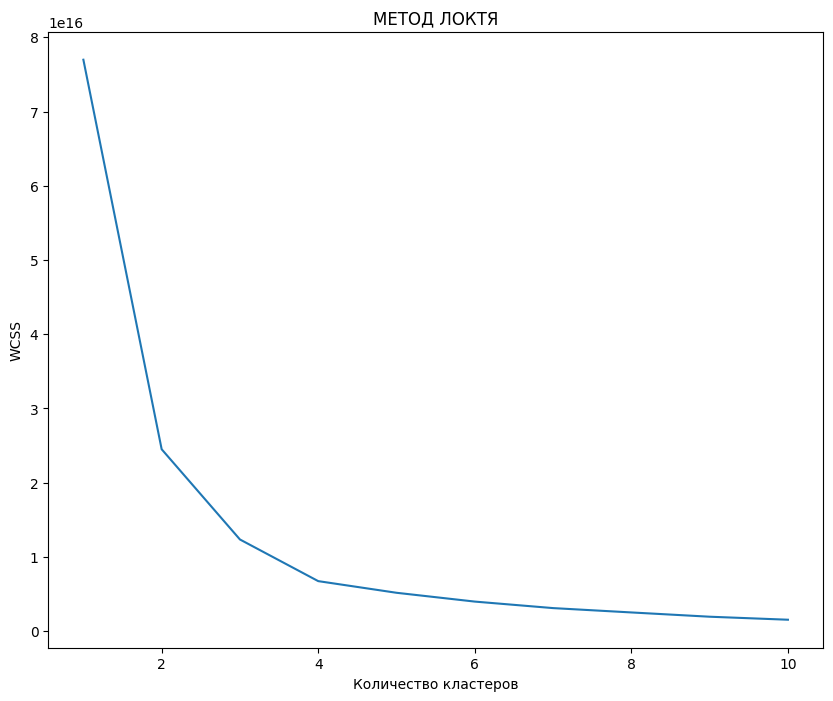

In [10]:
import matplotlib.pyplot as plt # библиотека для построения графиков.
from sklearn.cluster import KMeans # класс для выполнения кластеризаций методом K-Means.

X = dataCopy.values[:]
wcss = [] # пустой список wcss, в который будут добавляться значения суммы квадратов расстояний внутри кластеров.
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 12, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.subplots(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('МЕТОД ЛОКТЯ')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

Метод "локтя" на графике помогает определить оптимальное количество кластеров, когда происходит значительное падение WCSS. Точка, в которой график начинает "плоско" двигаться, обычно указывает на наилучшее количество кластеров для кластеризации.

Из графика можно понять, что количество кластеров равняется 2.

In [11]:
clustersQuantity = 2 
k_means =KMeans(init='k-means++', n_clusters=clustersQuantity, n_init=12)
k_means.fit(X)
labels = k_means.labels_
dataCopy['cluster'] = labels
print(dataCopy.head())

    place   pop1980   pop2000   pop2010   pop2023   pop2024   pop2030  \
39    504  19459900  28423400  32467000  37712500  38081200  39953500   
42    860  15619900  24787100  28385500  35652300  36361900  40248200   
43    458  12983400  22967800  28655800  35126300  35557700  37961700   
45    288  11941400  19637100  25475000  33787900  34427400  38222100   
50    524  15553100  24546500  27342000  29694600  29651100  30510000   

     pop2050      area  landAreaKm  netChange  growthRate  worldPercentage  \
39  43440400  446550.0    446300.0     0.0114      0.0098           0.0048   
42  52210800  447400.0    440650.0     0.0223      0.0199           0.0045   
43  44289800  330803.0    328550.0     0.0135      0.0123           0.0044   
45  50553000  238533.0    227533.0     0.0202      0.0189           0.0043   
50  34642000  147181.0    143350.0    -0.0015     -0.0015           0.0037   

     density  densityMi  rank       Avg_pop  cluster  
39   85.3265   220.9955    40  3.4219

    Теперь все данные разбиты по кластерным группам.

Приступим к построению графиков зависимости одной переменной от другой (plt.scatter).

Построим следующие графики:
1. График зависимости чистого изменения численности с 1980 по 2023 от плотности населения на кв. милю
2. График зависимости плотности населения от площади суши места
3. График зависимости общей площади места от процента населения от общей численности 
4. График зависимости ежегодного темпа прироста от рейтинга места по численности населения

Text(0, 0.5, 'rank')

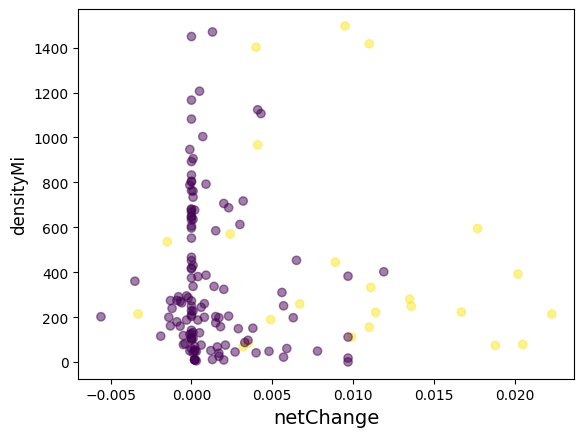

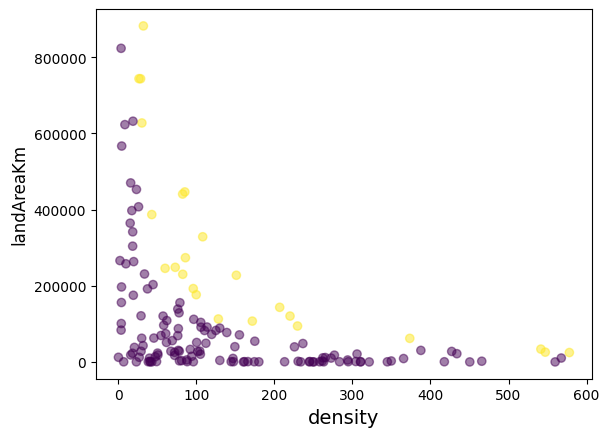

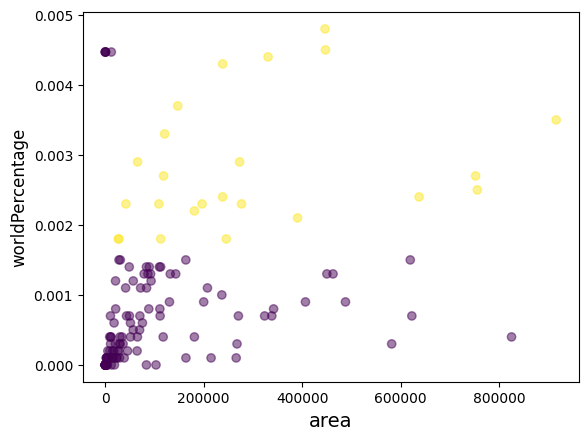

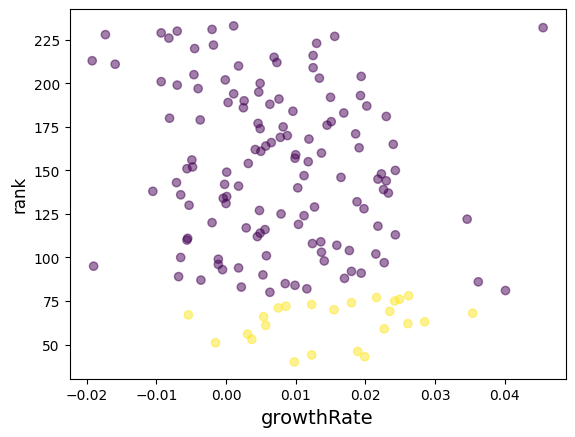

In [ ]:
plt.figure()
plt.scatter(X[:, 10], X[:, 14], c=labels.astype(float), alpha=.5)
plt.xlabel('netChange', fontsize = 20)
plt.ylabel('densityMi', fontsize = 18)

plt.figure()
plt.scatter(X[:, 13], X[:, 9], c=labels.astype(float), alpha=.5)
plt.xlabel('density', fontsize=20)
plt.ylabel('landAreaKm', fontsize=18)

plt.figure()
plt.scatter(X[:, 8], X[:, 12], c=labels.astype(float), alpha=.5)
plt.xlabel('area', fontsize = 20)
plt.ylabel('worldPercentage', fontsize = 18)

plt.figure()
plt.scatter(X[:, 11], X[:, 15], c=labels.astype(float), alpha=.5)
plt.xlabel('growthRate', fontsize = 20)
plt.ylabel('rank', fontsize = 18)


Вывод: 
Построив графики зависимостей, можно заметить что два явно выделяющихся кластера заметны на графике зависимости темпа прироста населения от рейтинга места по численности населения.
На графике зависимости плотности населения от площади суши места можно заметить, что чем меньше площадь, тем больше будет и плотность. Собственно, как и предполагалось.
По графику зависимости плотности населения на кв. милю от чистого изменения населения мы видим, что даже не смотря на различие по плотности населения, чистое изменение численности у большинства стран колеблется в районе 0.000. Это свидетельствует, что многие страны либо не изменили свое население с 1980 года, вплоть до 2023. Однако, есть тендеция среди стран, где плотность населения небольшая - многие из них увеличили свое население гораздо больше, чем страные с большей плотностью. 
А по графику зависимости процента населения от общей численности от общей площади места можно сделать вывод о том, что, в большинстве своем, чем меньше территория у страны (места), тем меньший у нее процент населения от общей численности, но есть и исключения. С увеличением площади места, также увеличивается и процент от общего населения, но по графику видно, что самая большая площадь не равно самый большой процент. 